KeyboardInterrupt: 

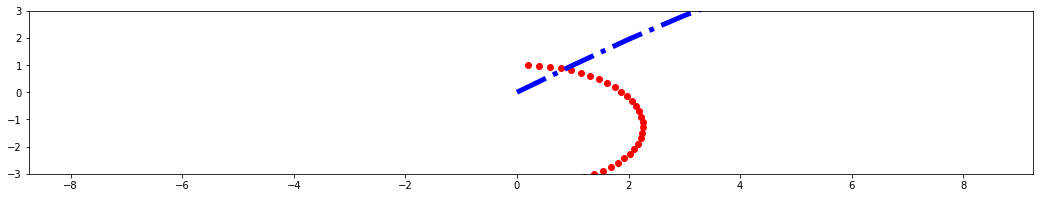

In [5]:
"""
Pure Pursuit
"""

from scipy.spatial import KDTree
import numpy as np
import math
import copy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
plt.figure(figsize=(18, 3))


class UGV_model:
    def __init__(self, x0, y0, theta0, L, v0, T):  # L:wheel base
        self.x = x0  # X
        self.y = y0  # Y
        self.theta = theta0  # headding
        self.l = L  # wheel base
        self.v = v0  # speed
        self.dt = T  # decision time periodic

    def update(self, vt, deltat):  # update ugv's state
        dx = self.v*np.cos(self.theta)
        dy = self.v*np.sin(self.theta)
        dtheta = self.v*np.tan(deltat)/self.l
        self.x += dx*self.dt
        self.y += dy*self.dt
        self.theta += dtheta*self.dt

    def plot_duration(self):
        plt.scatter(self.x, self.y, color='r')
        plt.axis([self.x-9, self.x+9, -3, 3])
#         plt.axis([self.x-9, self.x+9, -10, 10])
        if is_ipython:
            display.clear_output(wait=True)
            display.display(plt.gcf())


# set reference trajectory
refer_path = np.zeros((1000, 2))
refer_path[:, 0] = np.linspace(0, 1000, 1000)
refer_path[:,1] = 5*np.sin(refer_path[:,0]/5.0)

refer_tree = KDTree(refer_path)

plt.plot(refer_path[:, 0], refer_path[:, 1], '-.b', linewidth=5.0)
L = 2.0
v = 2.0
k = 1.0  # 前视距离ld = k*v+2.0
ugv = UGV_model(0, 1.0, 0, L, v, 0.1)
ind = 0
ld = k*v+2.0
for i in range(1000):
    robot_state = np.zeros(2)
    robot_state[0] = ugv.x
    robot_state[1] = ugv.y
    for i in range(ind, len(refer_path)):
        dist = np.linalg.norm(robot_state-refer_path[i])
        if dist >= ld:
            ind = i
            break

    dist = np.linalg.norm(robot_state-refer_path[ind])
    dx, dy = refer_path[ind] - robot_state
    alpha = math.atan2(dy, dx)
    delta = math.atan2(2.0*L*np.sin(alpha-ugv.theta) /
                       ld, 1)  # pure pursuit controller
    ugv.update(2.0, delta)
    ugv.plot_duration()
